In [20]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [21]:
secret_Number = '1000101'

In [22]:
circuit = QuantumCircuit(len(secret_Number) + 1, len(secret_Number))

In [23]:
circuit.h([k for k in range(len(secret_Number))])
circuit.x(len(secret_Number))
circuit.h(len(secret_Number))
length_Of_Sec_Num = len(secret_Number)

circuit.barrier()

for index, bit_At_Index in enumerate(secret_Number[::-1]):
    if(bit_At_Index == '1'):
        circuit.cnot(control_qubit=index, target_qubit=length_Of_Sec_Num)

circuit.barrier()

circuit.h([k for k in range(len(secret_Number))])

circuit.barrier()

circuit.measure([k for k in range(length_Of_Sec_Num)], [k for k in range(length_Of_Sec_Num)])

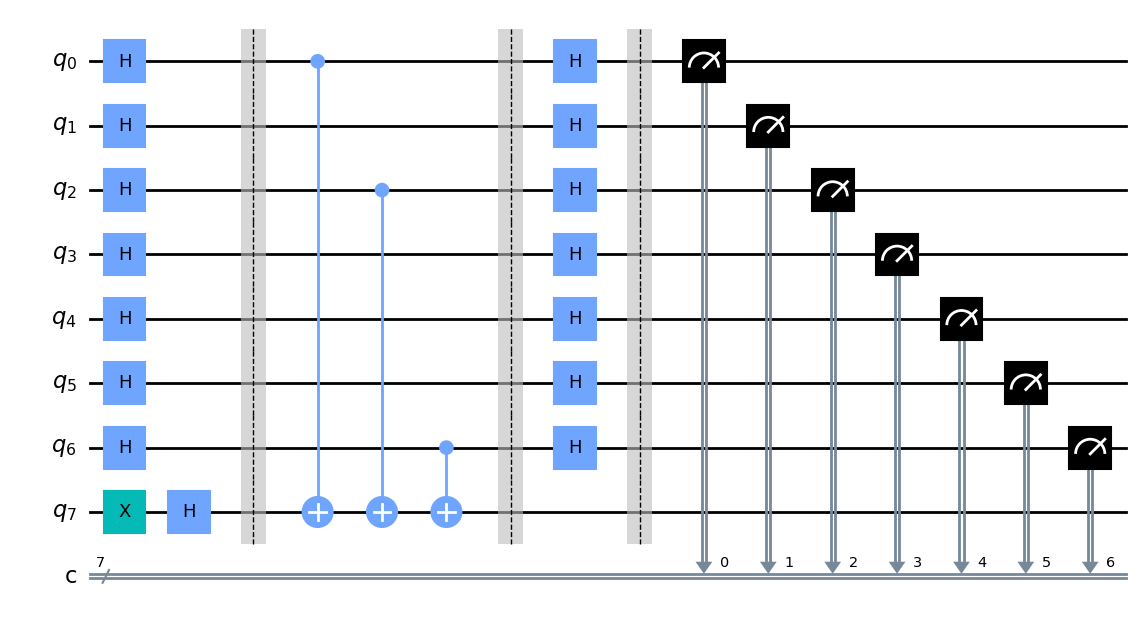

In [24]:
circuit.draw(output='mpl')

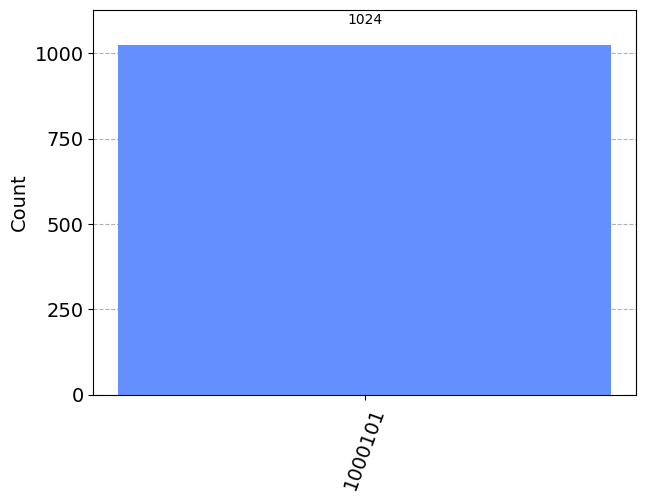

In [25]:
qasm_Simulator = Aer.get_backend('qasm_simulator')
counts = execute(circuit, backend=qasm_Simulator, shots=1024).result().get_counts()
plot_histogram(counts)